In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving ISP_One_Attrition_Data_file.csv to ISP_One_Attrition_Data_file.csv


In [ ]:
df=pd.read_csv('ISP_One_Attrition_Data_file.csv')

# Exploratory Data Analysis

In [ ]:
df.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


# Describe the columns to see the distrubution and count

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   active_cust                 100000 non-null  int64  
 1   income                      100000 non-null  int64  
 2   expenditure                 100000 non-null  float64
 3   months_on_network           100000 non-null  int64  
 4   Num_complaints              100000 non-null  int64  
 5   number_plan_changes         100000 non-null  int64  
 6   relocated                   100000 non-null  int64  
 7   monthly_bill                100000 non-null  int64  
 8   technical_issues_per_month  100000 non-null  int64  
 9   Speed_test_result           100000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 7.6 MB


active_cust                   0
income                        0
expenditure                   0
months_on_network             0
Num_complaints                0
number_plan_changes           0
relocated                     0
monthly_bill                  0
technical_issues_per_month    0
Speed_test_result             0
dtype: int64

In [ ]:
df.describe()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.578590,1855.279910,1409.669662,58.402450,4.012840,1.385410,0.123480,95.816450,3.31673,81.668540
std,0.493787,2712.385257,2174.330870,18.643736,0.285265,1.617101,0.328989,50.161327,1.24147,9.952554
min,0.000000,1130.000000,904.000000,-20.000000,3.000000,0.000000,0.000000,30.000000,1.00000,72.000000
25%,0.000000,1674.000000,1248.650000,47.000000,4.000000,0.000000,0.000000,45.000000,3.00000,78.000000
50%,1.000000,1805.000000,1358.400000,56.000000,4.000000,1.000000,0.000000,87.000000,4.00000,81.000000
75%,1.000000,1907.000000,1494.400000,70.000000,4.000000,2.000000,0.000000,133.000000,4.00000,85.000000
max,1.000000,229821.000000,183856.800000,449.000000,6.000000,9.000000,1.000000,181.000000,7.00000,332.000000


In [ ]:
df.columns

Index(['active_cust', 'income', 'expenditure', 'months_on_network',
       'Num_complaints', 'number_plan_changes', 'relocated', 'monthly_bill',
       'technical_issues_per_month', 'Speed_test_result'],
      dtype='object')

#                                  Outlier Analysis

# The below code produces box plots for each column and highlight the outliers

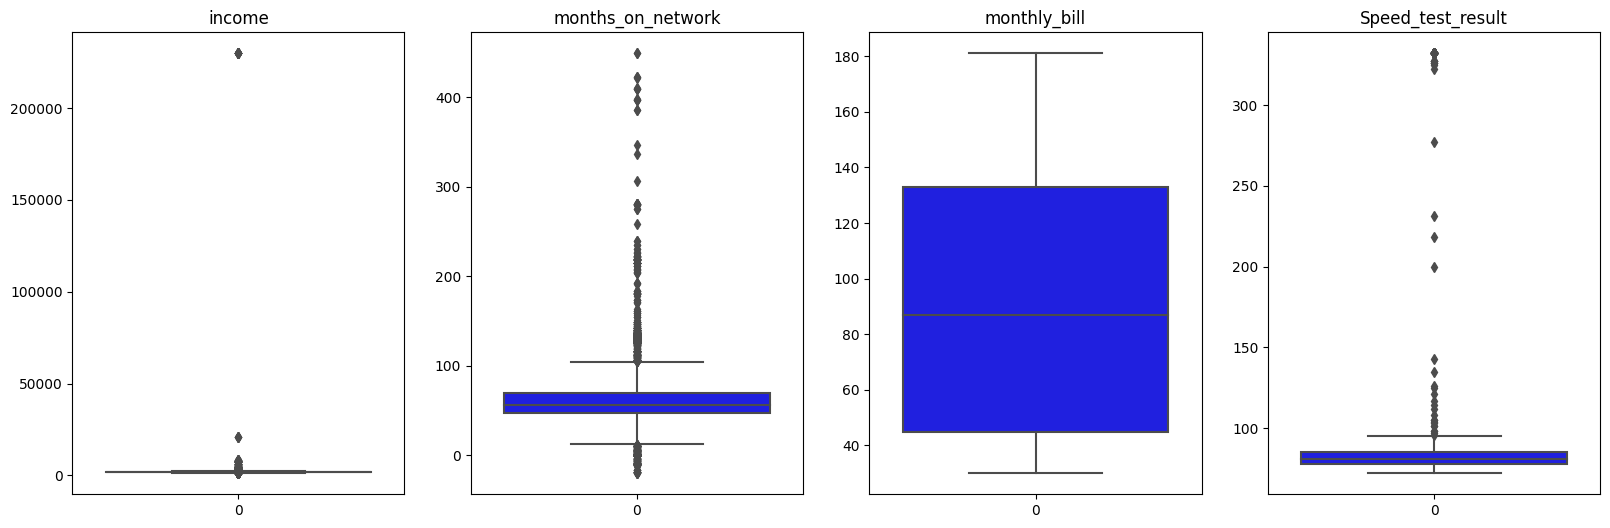

In [ ]:
plt.figure(figsize=(30,6))

plt.subplot(1, 6, 1)
plt.title('income')
sns.boxplot(df['income'],orient='vertical',color='blue')

# subplot 2
plt.subplot(1, 6, 2)
plt.title('months_on_network')
sns.boxplot(df['months_on_network'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 6, 3)
plt.title('monthly_bill')
sns.boxplot(df['monthly_bill'],orient='vertical',color='blue')

# subplot 4
plt.subplot(1, 6, 4)
plt.title('Speed_test_result')
sns.boxplot(df['Speed_test_result'],orient='vertical',color='blue')


plt.show()

# Check the correlation of features

In [ ]:
df_old = df
df_old.corr()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
active_cust,1.000000,0.001201,-0.003939,0.188113,-0.083481,-0.283100,-0.381069,-0.060156,-0.260249,0.156385
income,0.001201,1.000000,0.998436,-0.122607,0.003102,-0.003567,0.001924,-0.004715,-0.002584,0.010451
expenditure,-0.003939,0.998436,1.000000,-0.118989,0.000491,-0.007847,0.001288,-0.006006,-0.005726,0.015505
months_on_network,0.188113,-0.122607,-0.118989,1.000000,-0.081782,0.022509,-0.045471,0.008030,-0.040707,0.020413
Num_complaints,-0.083481,0.003102,0.000491,-0.081782,1.000000,0.073773,0.053539,0.004960,0.019577,0.004148
number_plan_changes,-0.283100,-0.003567,-0.007847,0.022509,0.073773,1.000000,0.595560,0.025379,0.180283,-0.009434
relocated,-0.381069,0.001924,0.001288,-0.045471,0.053539,0.595560,1.000000,0.019341,0.113460,0.015136
monthly_bill,-0.060156,-0.004715,-0.006006,0.008030,0.004960,0.025379,0.019341,1.000000,0.126871,-0.000345
technical_issues_per_month,-0.260249,-0.002584,-0.005726,-0.040707,0.019577,0.180283,0.113460,0.126871,1.000000,-0.054988
Speed_test_result,0.156385,0.010451,0.015505,0.020413,0.004148,-0.009434,0.015136,-0.000345,-0.054988,1.000000


# Drop the expenditure column as it is correlated to income

In [ ]:
df = df.drop(columns=['expenditure'] ,axis=1)

# Seperate categorical and numerical features

In [ ]:
categorical_features = [
    "Num_complaints",
    "number_plan_changes",
    "relocated",
    "technical_issues_per_month"    
]
numerical_features = ["income", "months_on_network", "monthly_bill" ,'Speed_test_result']
target = "active_cust"

In [ ]:
df['monthly_bill'].unique()

array([121, 133, 118, 123, 177,  31, 126,  30,  49,  35,  34,  46,  37,
        47,  78, 178, 125,  39,  40,  42,  43,  81,  33,  82, 130,  85,
        93,  89,  32,  48,  44,  45, 128, 165, 164, 163, 158, 166, 175,
       171, 169,  36,  76, 174,  50, 180, 132,  80,  86,  87,  94,  88,
        92,  38,  52,  79, 131, 119, 179, 168, 167, 170, 161,  51, 136,
       138, 127, 120, 122, 137, 134, 129,  41,  90,  73,  77,  83, 176,
       172,  84,  95, 124, 173, 162,  91,  75, 117, 181, 135, 159, 115,
       160, 116,  53,  74])

array([[<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'months_on_network'}>],
       [<Axes: title={'center': 'monthly_bill'}>,
        <Axes: title={'center': 'Speed_test_result'}>]], dtype=object)

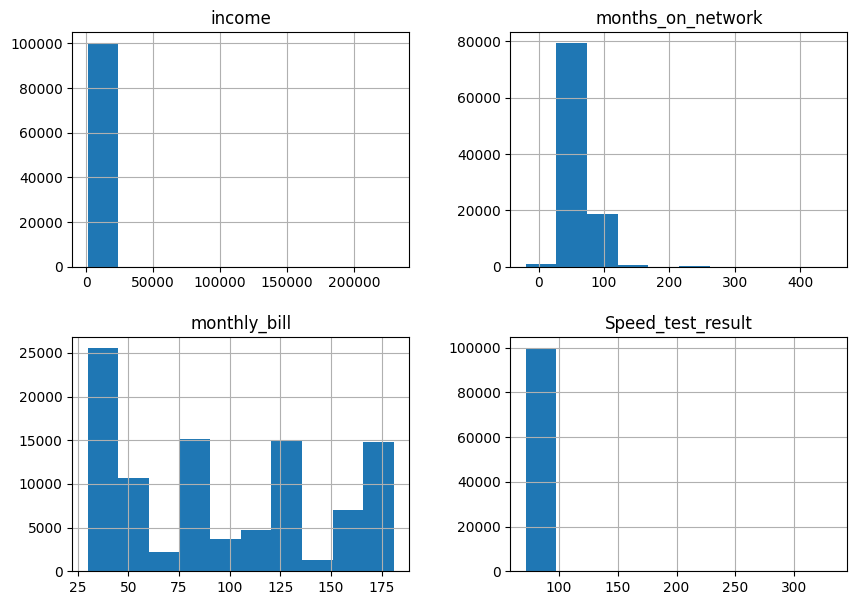

In [ ]:
numerical_features = ['income' , 'months_on_network','monthly_bill','Speed_test_result']
df[numerical_features].hist(bins=10, figsize=(10, 7))

In [ ]:
df['income'].max()

229821

array([<Axes: title={'center': 'income'}>,
       <Axes: title={'center': 'months_on_network'}>,
       <Axes: title={'center': 'monthly_bill'}>,
       <Axes: title={'center': 'Speed_test_result'}>], dtype=object)

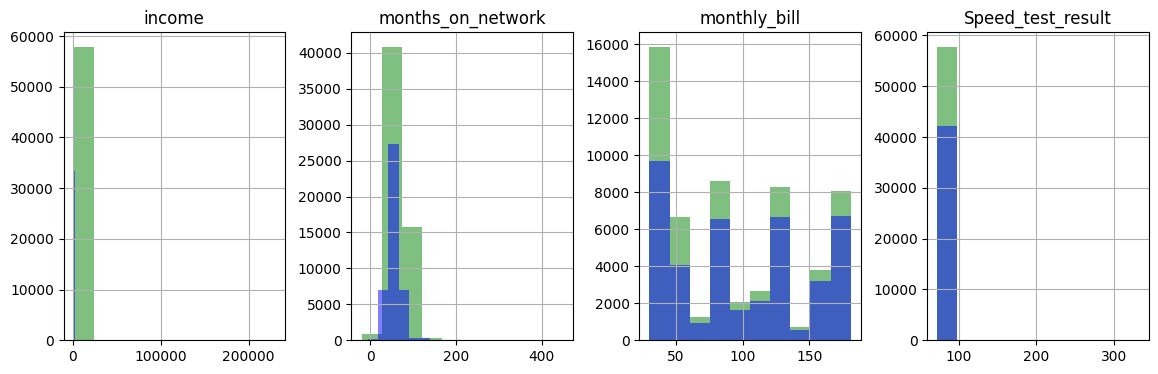

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
df[df.active_cust == 1][numerical_features].hist(bins=10, color="green", alpha=0.5, ax=ax) #activecust
df[df.active_cust == 0][numerical_features].hist(bins=10, color="blue", alpha=0.5, ax=ax) #lef


Text(0.5, 1.0, 'not attirated')

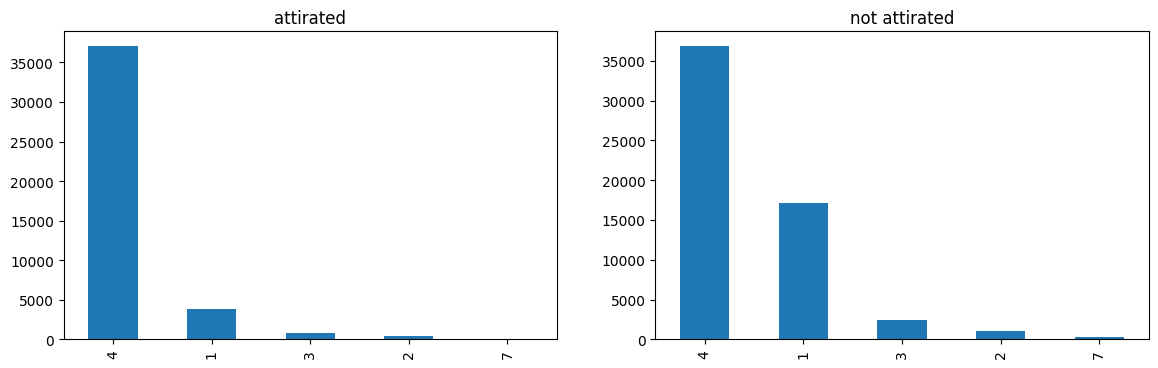

In [ ]:
feature = 'technical_issues_per_month'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.active_cust == 0][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('attirated')
df[df.active_cust == 1][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('not attirated')


Text(0.5, 1.0, 'attrition')

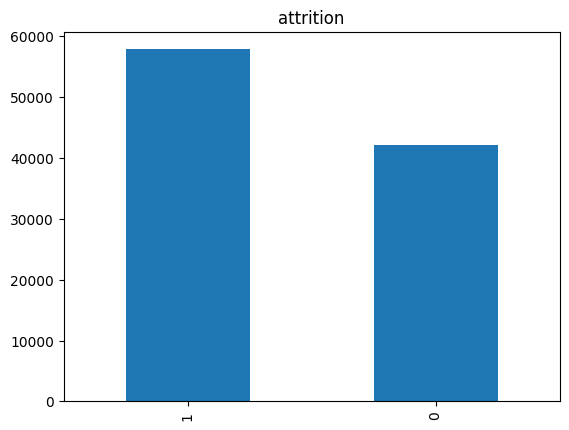

In [ ]:
df['active_cust'].value_counts().plot(kind='bar').set_title('attrition')


# Define Inter Quartile range function to get the upper and lower boundaries to remove the outliers from continuous variables

In [ ]:
def iqr(data):
    s = pd.Series(data)
    s.sort_values(ascending=True)
    Q1,Q3 =  np.percentile(s , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)     
    return lower_range , upper_range

# Define function for binning

In [ ]:
def cont_categorical(cont_data, qc ):
    return pd.qcut(cont_data,q=qc,labels=False,precision=0 ,duplicates='drop')

   # Remove Outliers using IQR function correct the outliers with the upper and lower range

In [ ]:
lr ,ur = iqr(df['income'])
lr = round(lr)
ur = round(ur)
df.loc[df['income'] <lr, 'income'] = lr
df.loc[df['income'] >ur, 'income'] = ur

lr ,ur = iqr(df['months_on_network'])
lr = round(lr)
ur = round(ur)
df.loc[df['months_on_network'] <lr, 'months_on_network'] = lr
df.loc[df['months_on_network'] >ur, 'months_on_network'] = ur

# Monthly bill field has no outliers and hence we are not applying the IQR function on it.
#lr ,ur = iqr(df['monthly_bill'])
#lr = round(lr)
#ur = round(ur)
#df.loc[df['monthly_bill'] <lr, 'monthly_bill'] = lr
#df.loc[df['monthly_bill'] >ur, 'monthly_bill'] = ur


lr ,ur = iqr(df['Speed_test_result'])
lr = round(lr)
ur = round(ur)
df.loc[df['Speed_test_result'] <lr, 'Speed_test_result'] = lr
df.loc[df['Speed_test_result'] >ur, 'Speed_test_result'] = ur

# Plot the features after removing the outliers

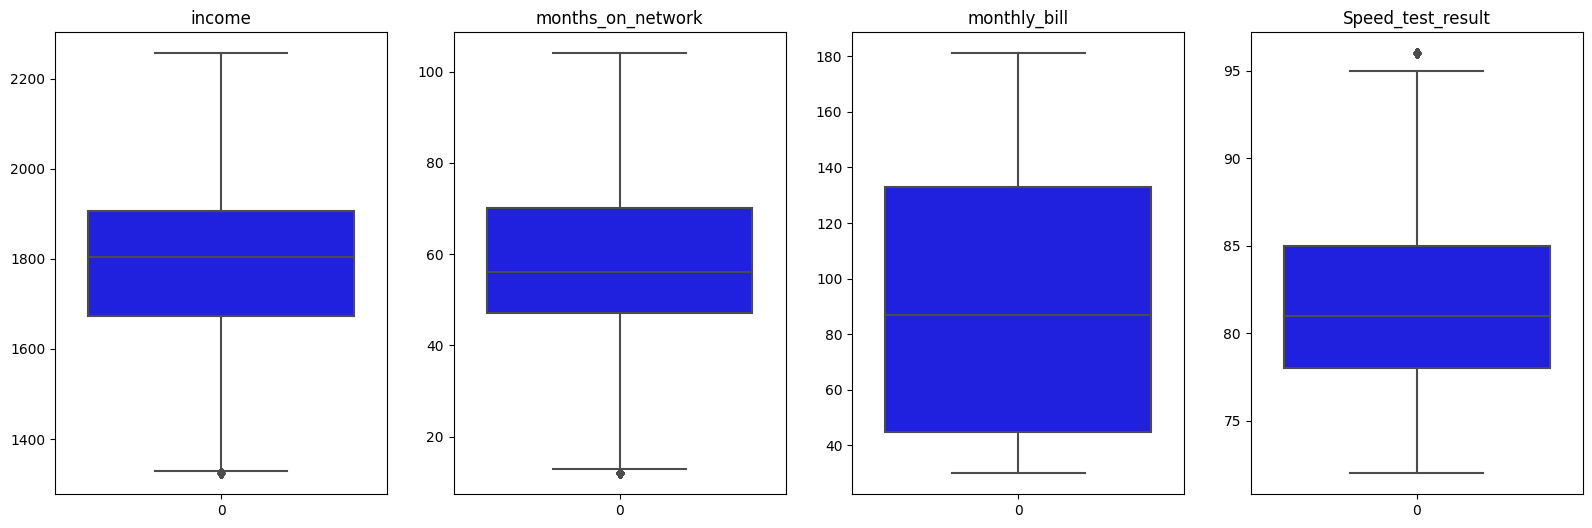

In [ ]:
plt.figure(figsize=(30,6))

plt.subplot(1, 6, 1)
plt.title('income')
sns.boxplot(df['income'],orient='vertical',color='blue')

# subplot 2
plt.subplot(1, 6, 2)
plt.title('months_on_network')
sns.boxplot(df['months_on_network'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 6, 3)
plt.title('monthly_bill')
sns.boxplot(df['monthly_bill'],orient='vertical',color='blue')

# subplot 4
plt.subplot(1, 6, 4)
plt.title('Speed_test_result')
sns.boxplot(df['Speed_test_result'],orient='vertical',color='blue')

plt.show()

In [ ]:
df['active_cust'].value_counts(normalize=True)

1    0.57859
0    0.42141
Name: active_cust, dtype: float64

In [ ]:
df.groupby('active_cust').mean()

,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
active_cust,,,,,,,,
0,1848.784296,53.985335,4.040744,1.921834,0.270378,99.352199,3.695309,79.766854
1,1783.700358,61.088353,3.992516,0.994711,0.016488,93.241224,3.040996,82.497779


# Descretization of numerical /continuous data using binning method

In [ ]:

col='income'
bins = 200
ns_income= cont_categorical(df[col] , bins)
df.update(ns_income)


col='months_on_network'
ns_mon= cont_categorical(df[col] , bins)
df.update(ns_mon)

col='monthly_bill'
ns_mb= cont_categorical(df[col] , bins)
df.update(ns_mb)

col='Speed_test_result'
ns_sr= cont_categorical(df[col] , bins)
df.update(ns_sr)

# Checking infogain for each categorical variable against target

In [ ]:
!pip install info_gain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from info_gain import info_gain
for cat in categorical_features:
    print(cat)
    ig  = info_gain.info_gain(df[target], df[cat])
    iv  = info_gain.intrinsic_value(df[target], df[cat])
    igr = info_gain.info_gain_ratio(df[target], df[cat])
    print(ig, iv, igr)

Num_complaints
0.003699089346618001 0.48374652938141627 0.007646751184650682
number_plan_changes
0.08371723308619516 2.2017702303334974 0.03802269280092623
relocated
0.07922880598719828 0.5392819729489944 0.14691536146470038
technical_issues_per_month
0.04061955002002704 1.073202963464318 0.037848898486924056


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_feature_names = []
label_encoders = {}
for categorical in categorical_features + [target]:
    label_encoders[categorical] = LabelEncoder()
    df[categorical] = label_encoders[categorical].fit_transform(df[categorical])
    names = label_encoders[categorical].classes_.tolist()
    print('Label encoder %s - values: %s' % (categorical, names))
    if categorical == target:
        continue
    categorical_feature_names.extend([categorical + '_' + str(name) for name in names])

Label encoder Num_complaints - values: [3, 4, 5, 6]
Label encoder number_plan_changes - values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Label encoder relocated - values: [0, 1]
Label encoder technical_issues_per_month - values: [1, 2, 3, 4, 7]
Label encoder active_cust - values: [0, 1]


In [ ]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold, cross_val_score,cross_val_predict
from xgboost import XGBClassifier


class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, df):
        return df[self.key]

In [ ]:
pipeline = Pipeline(
    [
        (
            "union",
            FeatureUnion(
                transformer_list=[
                    (
                        "categorical_features",
                        Pipeline(
                            [
                                ("selector", ItemSelector(key=categorical_features)),
                                ("onehot", OneHotEncoder())
                            ]
                        ),
                    )
                ]
                + [
                    (
                        "numerical_features",
                        Pipeline(
                            [
                                ("selector", ItemSelector(key=numerical_features)),
                                ("scalar", StandardScaler()),
                            ]
                        ),
                    )
                ]
            ),
        ),
        ("classifier", XGBClassifier(learning_rate =0.1,n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)),
    ]
)

**Run XGB with pipeline technique**

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)

pipeline.fit(df_train, df_train[target])
pred = pipeline.predict(df_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_test[target], pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      8418
           1       0.88      0.93      0.91     11582

    accuracy                           0.89     20000
   macro avg       0.89      0.88      0.88     20000
weighted avg       0.89      0.89      0.89     20000



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print ( df.count())

active_cust                   100000
income                        100000
months_on_network             100000
Num_complaints                100000
number_plan_changes           100000
relocated                     100000
monthly_bill                  100000
technical_issues_per_month    100000
Speed_test_result             100000
dtype: int64


# Create the target and features seperately

In [ ]:
target=df[['active_cust']]
features=df.drop('active_cust',axis=1)

In [ ]:
features

,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,12,57,1,1,0,52,3,11
1,10,57,1,1,0,64,3,11
2,15,54,1,1,0,49,3,11
3,15,54,1,1,0,54,3,11
4,21,52,1,1,0,89,3,11
...,...,...,...,...,...,...,...,...
99995,49,43,1,2,0,15,3,12
99996,46,43,1,2,0,16,3,12
99997,48,43,1,2,0,5,3,12
99998,55,41,1,2,0,16,3,12


**Run the data with XGB with out piplelining**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold, cross_val_score,cross_val_predict
from xgboost import XGBClassifier

In [ ]:
X,X_test,y,y_test =train_test_split(features,target,test_size=0.2,random_state=42)
X.shape,y.shape,X_test.shape,y_test.shape
XGB=XGBClassifier(learning_rate =0.1,n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
XGmodel=XGB.fit(X,y)

In [ ]:
pred=XGmodel.predict(X_test)
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      8418
           1       0.88      0.93      0.90     11582

    accuracy                           0.89     20000
   macro avg       0.89      0.88      0.88     20000
weighted avg       0.89      0.89      0.89     20000



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X,y)
pred = logmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      8418
           1       0.79      0.81      0.80     11582

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



**RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X,y)
pred=clf.predict(X_test)
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

<ipython-input-40-9a1d78d86fd2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X,y)


              precision    recall  f1-score   support

           0       0.87      0.84      0.85      8418
           1       0.88      0.91      0.90     11582

    accuracy                           0.88     20000
   macro avg       0.88      0.87      0.87     20000
weighted avg       0.88      0.88      0.88     20000



**LSTM MODEL with 64 hidden layers**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

# Split the data into training and testing sets
X,X_test,y,y_test =train_test_split(features,target,test_size=0.2,random_state=42)

# Convert dataframes to numpy arrays
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the shape of the input data
n_features = X.shape[1]
n_steps = 1

# Reshape the input data for LSTM model
X = X.reshape((X.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1000/1000 [==============================] - 11s 4ms/step - loss: 0.5154 - accuracy: 0.7452 - val_loss: 0.4527 - val_accuracy: 0.7865
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4510 - accuracy: 0.7867 - val_loss: 0.4665 - val_accuracy: 0.7786
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4401 - accuracy: 0.7935 - val_loss: 0.4338 - val_accuracy: 0.8045
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4309 - accuracy: 0.7996 - val_loss: 0.4294 - val_accuracy: 0.8041
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4232 - accuracy: 0.8045 - val_loss: 0.4176 - val_accuracy: 0.8111
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4119 - accuracy: 0.8105 - val_loss: 0.4114 - val_accuracy: 0.8111
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4059 - accuracy: 0.8144 - val_loss: 0.4068 - val_accuracy

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Print classification report
print(classification_report(y_test, y_pred))


625/625 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      8418
           1       0.81      0.91      0.86     11582

    accuracy                           0.83     20000
   macro avg       0.83      0.81      0.82     20000
weighted avg       0.83      0.83      0.82     20000



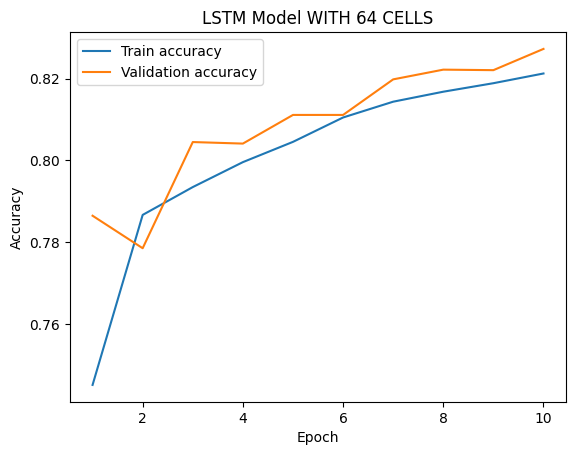

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = np.arange(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('LSTM Model WITH 64 CELLS')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**LSTM MODEL with 128 hidden layers**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

# Split the data into training and testing sets
X,X_test,y,y_test =train_test_split(features,target,test_size=0.2,random_state=42)

# Convert dataframes to numpy arrays
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the shape of the input data
n_features = X.shape[1]
n_steps = 1

# Reshape the input data for LSTM model
X = X.reshape((X.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1000/1000 [==============================] - 6s 5ms/step - loss: 0.5089 - accuracy: 0.7467 - val_loss: 0.4716 - val_accuracy: 0.7781
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4564 - accuracy: 0.7775 - val_loss: 0.4648 - val_accuracy: 0.7684
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4461 - accuracy: 0.7847 - val_loss: 0.4402 - val_accuracy: 0.7939
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4358 - accuracy: 0.7945 - val_loss: 0.4329 - val_accuracy: 0.8032
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4213 - accuracy: 0.8091 - val_loss: 0.4210 - val_accuracy: 0.8171
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4056 - accuracy: 0.8207 - val_loss: 0.4070 - val_accuracy: 0.8241
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3947 - accuracy: 0.8295 - val_loss: 0.4175 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Print classification report
print(classification_report(y_test, y_pred))


625/625 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      8418
           1       0.84      0.90      0.87     11582

    accuracy                           0.84     20000
   macro avg       0.85      0.83      0.84     20000
weighted avg       0.84      0.84      0.84     20000



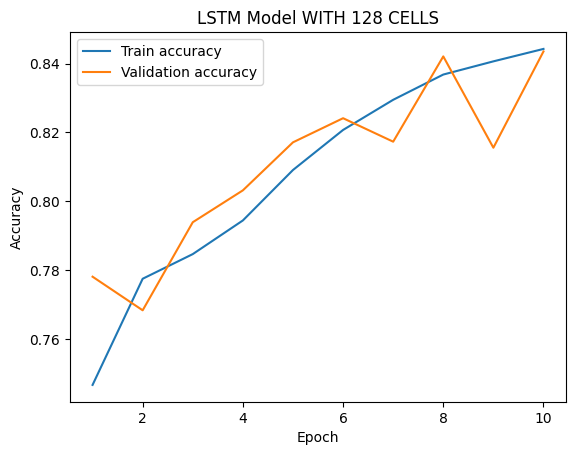

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = np.arange(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('LSTM Model WITH 128 CELLS')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**GRU MODEL with 64 hidden layer**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, GRU
import numpy as np

# Split the data into training and testing sets
X,X_test,y,y_test =train_test_split(features,target,test_size=0.2,random_state=42)

# Convert dataframes to numpy arrays
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the shape of the input data
n_features = X.shape[1]
n_steps = 1

# Reshape the input data for GRU model
X = X.reshape((X.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

# Define the GRU model
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1000/1000 [==============================] - 6s 4ms/step - loss: 0.5530 - accuracy: 0.7370 - val_loss: 0.4797 - val_accuracy: 0.7688
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4586 - accuracy: 0.7809 - val_loss: 0.4710 - val_accuracy: 0.7709
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4420 - accuracy: 0.7920 - val_loss: 0.4447 - val_accuracy: 0.7968
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4351 - accuracy: 0.7993 - val_loss: 0.4323 - val_accuracy: 0.8089
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4313 - accuracy: 0.8012 - val_loss: 0.4270 - val_accuracy: 0.8079
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4279 - accuracy: 0.8045 - val_loss: 0.4264 - val_accuracy: 0.8103
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4266 - accuracy: 0.8059 - val_loss: 0.4219 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Print classification report
print(classification_report(y_test, y_pred))


625/625 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      8418
           1       0.85      0.79      0.82     11582

    accuracy                           0.80     20000
   macro avg       0.79      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000



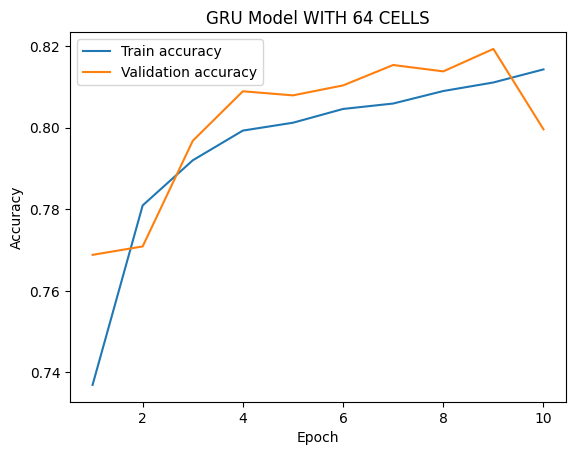

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = np.arange(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('GRU Model WITH 64 CELLS')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**GRU MODEL with 128 hidden layer**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, GRU
import numpy as np

# Split the data into training and testing sets
X,X_test,y,y_test =train_test_split(features,target,test_size=0.2,random_state=42)

# Convert dataframes to numpy arrays
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the shape of the input data
n_features = X.shape[1]
n_steps = 1

# Reshape the input data for GRU model
X = X.reshape((X.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

# Define the GRU model
model = Sequential()
model.add(GRU(128, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1000/1000 [==============================] - 6s 4ms/step - loss: 0.4960 - accuracy: 0.7561 - val_loss: 0.4551 - val_accuracy: 0.7793
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4489 - accuracy: 0.7877 - val_loss: 0.4378 - val_accuracy: 0.7962
Epoch 3/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4370 - accuracy: 0.7960 - val_loss: 0.4611 - val_accuracy: 0.7749
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4285 - accuracy: 0.8019 - val_loss: 0.4238 - val_accuracy: 0.8036
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4218 - accuracy: 0.8054 - val_loss: 0.4272 - val_accuracy: 0.8035
Epoch 6/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4170 - accuracy: 0.8077 - val_loss: 0.4296 - val_accuracy: 0.7994
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4116 - accuracy: 0.8120 - val_loss: 0.4214 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Print classification report
print(classification_report(y_test, y_pred))


625/625 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      8418
           1       0.83      0.89      0.86     11582

    accuracy                           0.83     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000



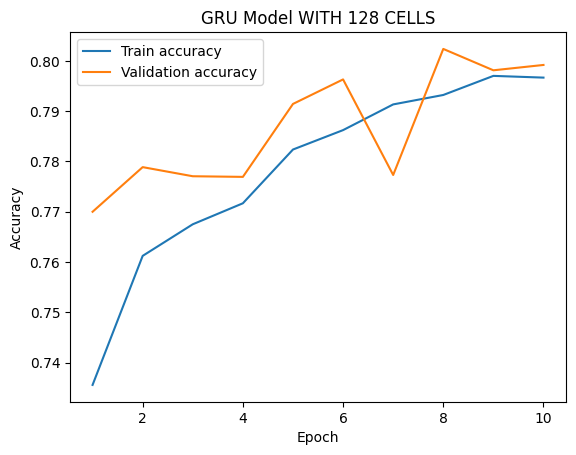

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = np.arange(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('GRU Model WITH 128 CELLS')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**RNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import numpy as np

# Split the data into training and testing sets
X,X_test,y,y_test =train_test_split(features,target,test_size=0.2,random_state=42)

# Convert dataframes to numpy arrays
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the shape of the input data
n_features = X.shape[1]
n_steps = 1

# Reshape the input data for RNN model
X = X.reshape((X.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1000/1000 [==============================] - 5s 4ms/step - loss: 0.7357 - accuracy: 0.7300 - val_loss: 0.4769 - val_accuracy: 0.7637
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4860 - accuracy: 0.7640 - val_loss: 0.4866 - val_accuracy: 0.7681
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4786 - accuracy: 0.7691 - val_loss: 0.4646 - val_accuracy: 0.7779
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4721 - accuracy: 0.7734 - val_loss: 0.4604 - val_accuracy: 0.7791
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4682 - accuracy: 0.7762 - val_loss: 0.4480 - val_accuracy: 0.7916
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4439 - accuracy: 0.7925 - val_loss: 0.4360 - val_accuracy: 0.7984
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4453 - accuracy: 0.7924 - val_loss: 0.4331 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test data
y_pred = model.predict(X_test)

# Convert the predictions to binary values
y_pred = np.round(y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))


625/625 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.71      0.75      8418
           1       0.80      0.88      0.84     11582

    accuracy                           0.81     20000
   macro avg       0.81      0.79      0.80     20000
weighted avg       0.81      0.81      0.80     20000



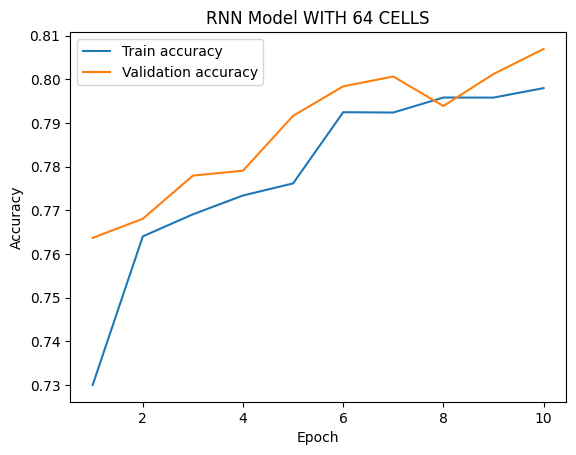

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = np.arange(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('RNN Model WITH 64 CELLS')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import numpy as np

# Split the data into training and testing sets
X,X_test,y,y_test =train_test_split(features,target,test_size=0.2,random_state=42)

# Convert dataframes to numpy arrays
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the shape of the input data
n_features = X.shape[1]
n_steps = 1

# Reshape the input data for RNN model
X = X.reshape((X.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1000/1000 [==============================] - 5s 4ms/step - loss: 0.5681 - accuracy: 0.7356 - val_loss: 0.4838 - val_accuracy: 0.7700
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4857 - accuracy: 0.7612 - val_loss: 0.4691 - val_accuracy: 0.7789
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4765 - accuracy: 0.7675 - val_loss: 0.4645 - val_accuracy: 0.7771
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4772 - accuracy: 0.7717 - val_loss: 0.4654 - val_accuracy: 0.7769
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4619 - accuracy: 0.7824 - val_loss: 0.4520 - val_accuracy: 0.7914
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4601 - accuracy: 0.7862 - val_loss: 0.4490 - val_accuracy: 0.7963
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4549 - accuracy: 0.7913 - val_loss: 0.4886 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test data
y_pred = model.predict(X_test)

# Convert the predictions to binary values
y_pred = np.round(y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))


625/625 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      8418
           1       0.83      0.83      0.83     11582

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000



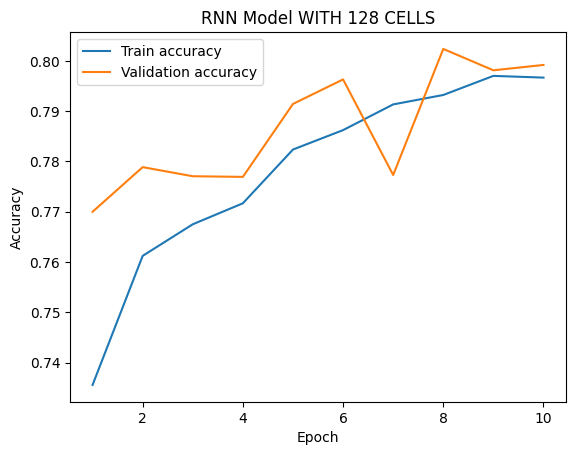

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = np.arange(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('RNN Model WITH 128 CELLS')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()